# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 2 - focus on those patients identified as being registered at a GP practice within the research period, with a dependence forming medication, looking at GP consultations and social prescribing.

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

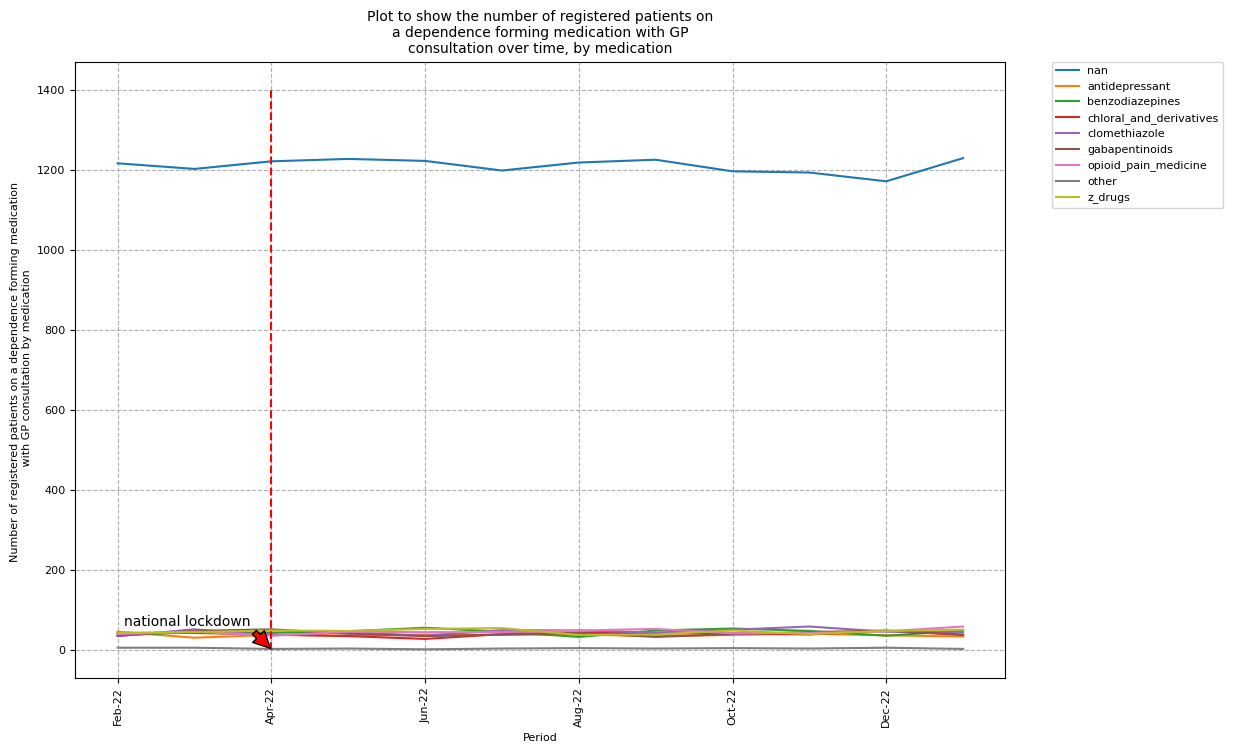

In [2]:
data_measure_gp_consultation_with_medication_rate = pd.read_csv("../output/measure_gp_consultation_with_medication_rate.csv", parse_dates=["date"])
data_measure_gp_consultation_with_medication_rate = data_measure_gp_consultation_with_medication_rate.loc[data_measure_gp_consultation_with_medication_rate["with_consultation"] == 1, :]
df_measure_gp_consultation_with_medication_rate = pd.DataFrame.pivot(data_measure_gp_consultation_with_medication_rate, index='date', columns='medication', values='research_population')
df_measure_gp_consultation_with_medication_rate.index = pd.to_datetime(df_measure_gp_consultation_with_medication_rate.index).strftime('%b-%y')
ax = df_measure_gp_consultation_with_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with GP consultation by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=220000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_with_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [3]:
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1216                45                 36                         42               34                35                      39        5         42
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1229                33                 48                         37               44                38                      58        2         50


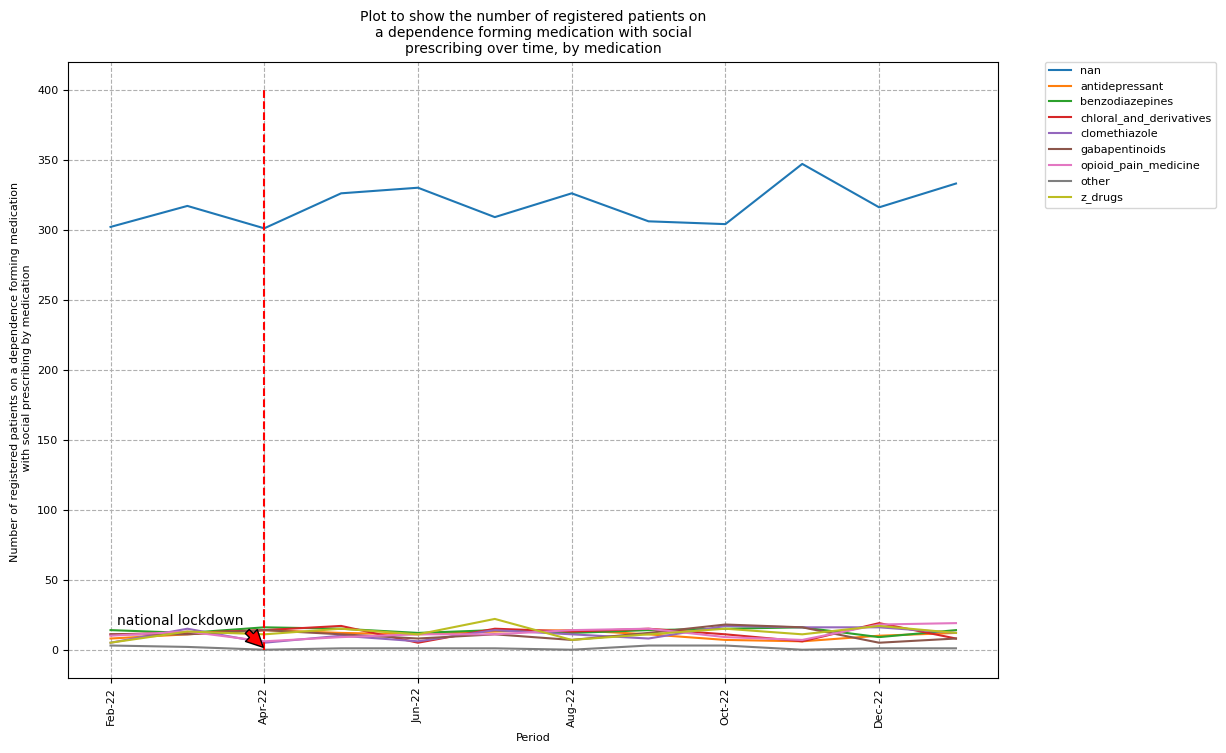

In [4]:
data_measure_social_prescribing_with_medication_rate = pd.read_csv("../output/measure_social_prescribing_with_medication_rate.csv", parse_dates=["date"])
data_measure_social_prescribing_with_medication_rate = data_measure_social_prescribing_with_medication_rate.loc[data_measure_social_prescribing_with_medication_rate["with_social_prescribing"] == 1, :]
df_measure_social_prescribing_with_medication_rate = pd.DataFrame.pivot(data_measure_social_prescribing_with_medication_rate, index='date', columns='medication', values='research_population')
df_measure_social_prescribing_with_medication_rate.index = pd.to_datetime(df_measure_social_prescribing_with_medication_rate.index).strftime('%b-%y')
ax = df_measure_social_prescribing_with_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with social prescribing by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=500000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication with social prescribing over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_with_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [5]:
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1216                45                 36                         42               34                35                      39        5         42
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1229                33                 48                         37               44                38                      58        2         50


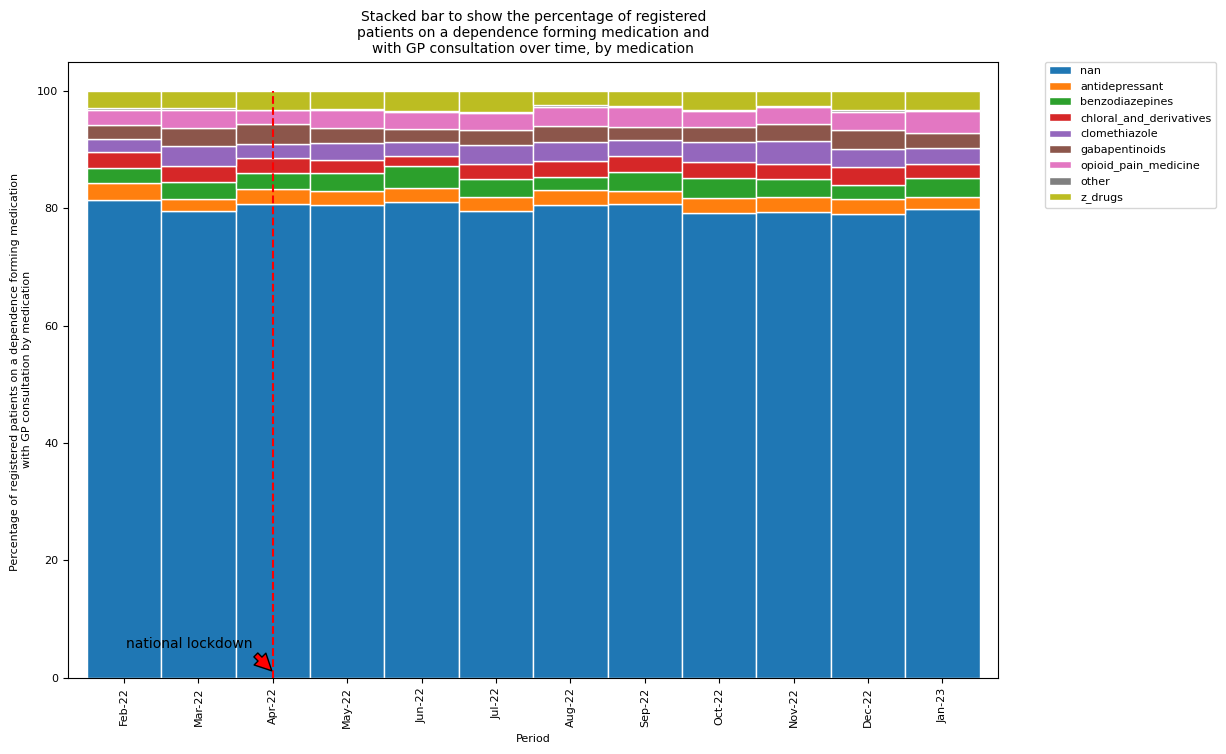

In [6]:
df_consult_stacked = pd.DataFrame(df_measure_gp_consultation_with_medication_rate)
df_consult_stacked.head()
totg = df_consult_stacked.sum(axis=1)
perg = df_consult_stacked.div(totg, axis=0).mul(100).round(2)
ax = perg.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='center', fontsize=7)title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by medication'
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_with_medication_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [7]:
print(tabulate(perg.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perg.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22  81.39              3.01               2.41                       2.81             2.28              2.34                    2.61     0.33       2.81
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23  79.86              2.14               3.12                        2.4             2.86              2.47                    3.77     0.13       3.25


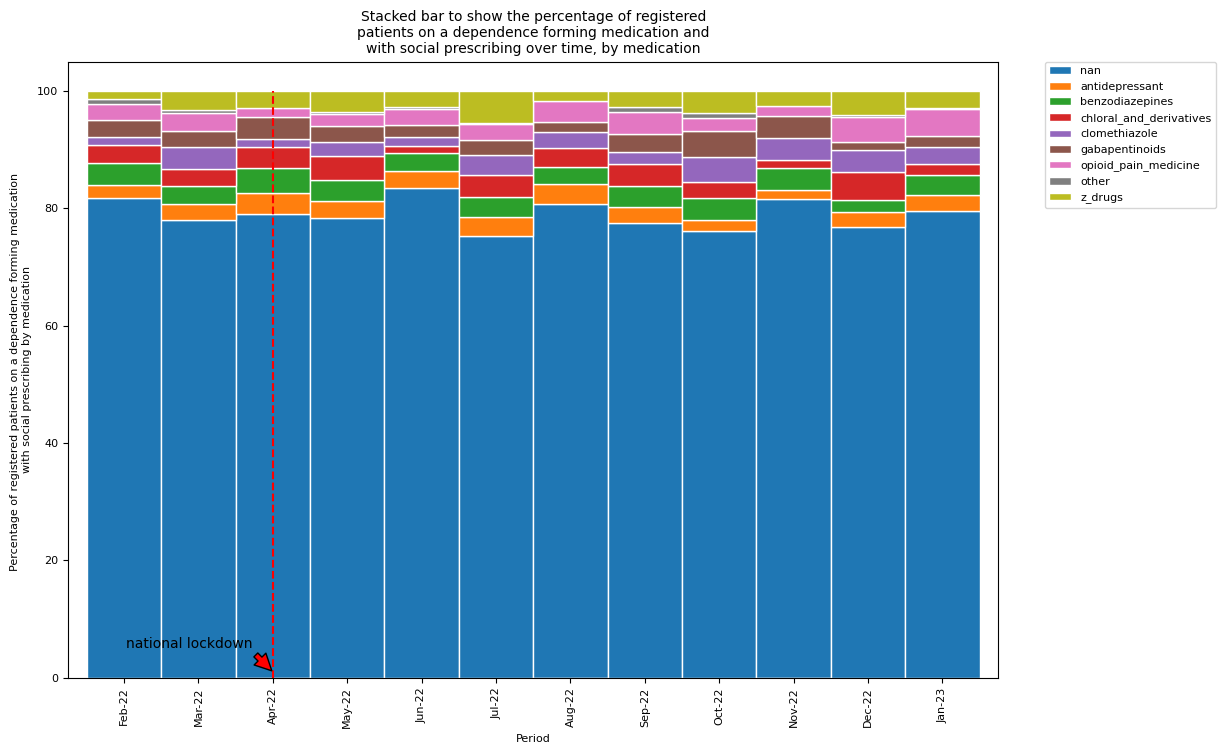

In [8]:
df_socialrx_stacked = pd.DataFrame(df_measure_social_prescribing_with_medication_rate)
df_socialrx_stacked.head()
tots = df_socialrx_stacked.sum(axis=1)
pers = df_socialrx_stacked.div(tots, axis=0).mul(100).round(2)
ax = pers.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith social prescribing by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with social prescribing over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_with_medication_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [9]:
print(tabulate(pers.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(pers.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22  81.84              2.17               3.79                       2.98             1.36              2.98                    2.71     0.81       1.36
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23  79.47              2.86               3.34                       1.91             2.86              1.91                    4.53     0.24       2.86
